<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
## SEM2 2022/3

### CS6462 Etivity 3 - Causal Graphical Model vs Bayesian Graphical Model

### Instructor: Emil Vassev
April 10th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Siddharth
### Student Surname: Prince
### Student ID: 23052058
### Date of Final Submission: <span style="color:red">27/04/2024</span>
***

## Task
In this e-tivity, you are asked to build a Causal Graphical Model by using the <b>causalgraphicalmodels</b> library and do interventions on this model. Then you are asked to build the same model but as a Bayesian Network by using the <b>BayesianNetwork</b> construct of the <b>pgmpy.models</b> library. Both models need to cover a real-life scenario targeting getting late at work. 

## The real-life scenario

Here, you can find a set of random variables X = {X1, X2, ... , X12}:
<li>X1 = “late for work”</li> 
<li>X2 = “low speed due to long vehicle queues”</li> 
<li>X3 = “traffic jam”</li>
<li>X4 = “traffic accident”</li> 
<li>X5 = “heavy rain”</li>
<li>X6 = “snow”</li>
<li>X7 = “slippery road”</li> 
<li>X8 = “getting up late”</li>
<li>X9 = “road is blocked”</li>
<li>X10 = “taking a longer alternative route”</li> 
<li>X11 = “car malfunction”</li> 
<li>X12 = “car towing”</li> 

Use your logic to build a <b>realistic</b> causal network, which then can be transformed to a Bayesian Network (Causal Bayesian Network). In this network, the parent-child relationships should be deduced based on your logic. You need to use all the random variables.
    
### Here are the steps you need to follow:

## Step 1: Create and Execute the Causal Network (50%)

### Step 1.1. Describe your logic of deducing the causal relationships. (10%)
Outline the problem in terms of:
<li>causal dependencies among the random variables</li>
<li>short rationale on the parent-child relationships</li>    


Being late to work, X1 seems to be the scenario that all the other scenarios ultimately cause. So that should be the end node. The possible paths along that lead to this with the other random variables (scenarios) are as follows;
- **Scenario #1:** traffic accident (X4) -> traffic jam (X3) -> low speed due to long vehicle queues (X2) -> late for work (X1)
    - This scenario is when an accident causes an issue with the regular commute and slows one down.
- **Scenario #2:** heavy rain (X5)/ snow (X6) -> slippery road (X7) -> low speed due to long vehicle queues (X2) -> late for work (X1)
    - Inclement weather is a usual suspect in making one late to work. 
- **Scenario #3:** getting up late (X8) -> late for work (X1)
    - This is self explanatory. If you're late to start your day, you are probably going to be late to work.
- **Scenario #4:** traffic accident (X4) -> road is blocked (X9) -> taking a longer alternative route (X10) -> late for work (X1)
    - This is a variation of the first scenario where instead of waiting for the congestion to clear up along the regular route, one takes a diversion which also ends up with making them late because it is a longer route.
- **Scenario #5:** car malfunction (X11) -> car towing (X12) -> late for work (X1)
    - If you are dependent on your car for your commute and it breaks down, you're most definitely going to end up late while you need to take care of the car and find alternate methods of transport.

### Step 1.2: Create and show the Causal DAG (30%)

In [1]:
# To workaround the import error as suggested from the forum thread
import collections.abc
collections.Iterable = collections.abc.Iterable
from collections.abc import Iterable

In [12]:
from causalgraphicalmodels import CausalGraphicalModel
lateToWork = CausalGraphicalModel(
    nodes=['late for work','low speed due to long vehicle queues','traffic jam','traffic accident','heavy rain','snow',
           'slippery road','getting up late','road is blocked','taking a longer alternative route','car malfunction','car towing'],
    edges=[
        ('traffic accident', 'traffic jam'), ('traffic jam', 'low speed due to long vehicle queues'), ('low speed due to long vehicle queues', 'late for work'), # Scenario #1
        ('heavy rain', 'slippery road'), ('snow', 'slippery road'), ('slippery road', 'low speed due to long vehicle queues'), ('low speed due to long vehicle queues', 'late for work'), # Scenario #2
        ('getting up late', 'late for work'), # Scenario #3
        ('traffic accident', 'road is blocked'), ('road is blocked', 'taking a longer alternative route'), ('taking a longer alternative route', 'late for work'), # Scenario #4
        ('car malfunction', 'car towing'), ('car towing', 'late for work') # Scenario #5
    ]
)

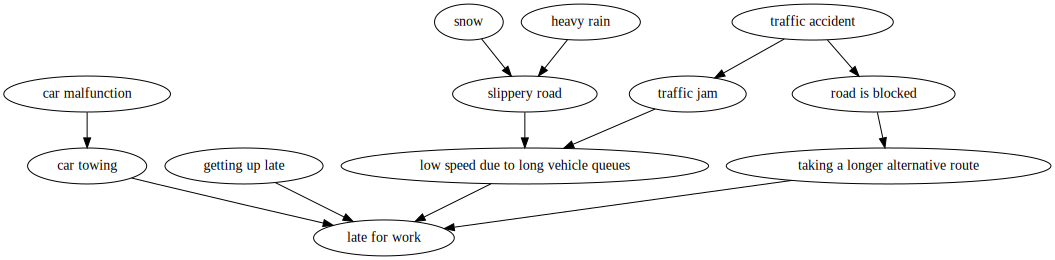

In [13]:
# Plotting the causal DAG
lateToWork.draw()

The above DAG has all the scenarios spelt out. Let's create another causal graph model with all the corresponding X variables names so that it is represented concisely which we will use from here on out.

In [15]:
lateToWorkX = CausalGraphicalModel(
    nodes=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12'],
    edges=[
        ('X4', 'X3'), ('X3', 'X2'), ('X2', 'X1'), # Scenario #1
        ('X5', 'X7'), ('X6', 'X7'), ('X7', 'X2'), ('X2', 'X1'), # Scenario #2
        ('X8', 'X1'), # Scenario #3
        ('X4', 'X9'), ('X9', 'X10'), ('X10', 'X1'), # Scenario #4
        ('X11', 'X12'), ('X12', 'X1') # Scenario #5
    ]
)

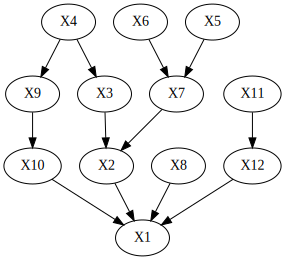

In [16]:
# Plotting the causal DAG
lateToWorkX.draw()

### Step 1.3: Show the Joint Distibution of the Causal Network (1%)

In [18]:
print(lateToWorkX.get_distribution())

P(X4)P(X5)P(X6)P(X8)P(X11)P(X3|X4)P(X9|X4)P(X7|X5,X6)P(X12|X11)P(X10|X9)P(X2|X3,X7)P(X1|X2,X8,X10,X12)


### Step 1.4: Run the intervention do(“road is blocked”) (7%)

In [21]:
# Running the intervention do("road is blocked")
x9_do = lateToWorkX.do('X9') # X9 = road is blocked
x9_do

CausalGraphicalModel(X1, X10, X11, X12, X2, X3, X4, X5, X6, X7, X8, X9)

### Step 1.5: Show the Causal DAG with the intervention "on" (1%)

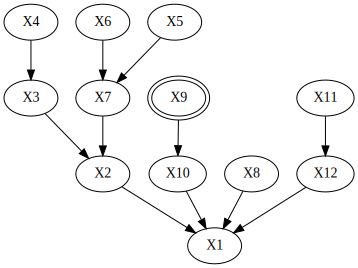

In [22]:
# Showing the causal DAG with the intervention 'on'
x9_do.draw()

### Step 1.6: Show the Joint Distibution of the Causal Network with the intervention "on" (1%)

In [24]:
# Joint distribution of the causal network with the interventionof X9 'on'
print(x9_do.get_distribution())

P(X4)P(X6)P(X5)P(X11)P(X8)P(X3|X4)P(X7|X5,X6)P(X12|X11)P(X10|do(X9))P(X2|X3,X7)P(X1|X2,X8,X10,X12)


***
## Note
In <b>Step 2</b> you need to transform the model, you have built in Step 1, to a Bayesian Network. Here, you will need to repeat some of the activities you have already done in E-tivity 2. Please, consider all the random variables <b>X</b> binary and the probability distribution of each variable as <b>{true=50%, false=50%}</b>. 
***

## Step 2: Create and Execute the Bayesian Network (50%)

### Step 2.1: Create and show the DAG of the Bayesian Network (20%)

#### Creating a Bayesian Network

In [26]:
# use the pgmpy library: "from pgmpy.models import BayesianNetwork"
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

model = BayesianNetwork([
        ('X4', 'X3'), ('X3', 'X2'), ('X2', 'X1'), # Scenario #1
        ('X5', 'X7'), ('X6', 'X7'), ('X7', 'X2'), ('X2', 'X1'), # Scenario #2
        ('X8', 'X1'), # Scenario #3
        ('X4', 'X9'), ('X9', 'X10'), ('X10', 'X1'), # Scenario #4
        ('X11', 'X12'), ('X12', 'X1') # Scenario #5
    ])

In [27]:
model.nodes()

NodeView(('X4', 'X3', 'X2', 'X1', 'X5', 'X7', 'X6', 'X8', 'X9', 'X10', 'X11', 'X12'))

In [28]:
model.edges()

OutEdgeView([('X4', 'X3'), ('X4', 'X9'), ('X3', 'X2'), ('X2', 'X1'), ('X5', 'X7'), ('X7', 'X2'), ('X6', 'X7'), ('X8', 'X1'), ('X9', 'X10'), ('X10', 'X1'), ('X11', 'X12'), ('X12', 'X1')])

#### Creating the DAG of the Bayesian Network

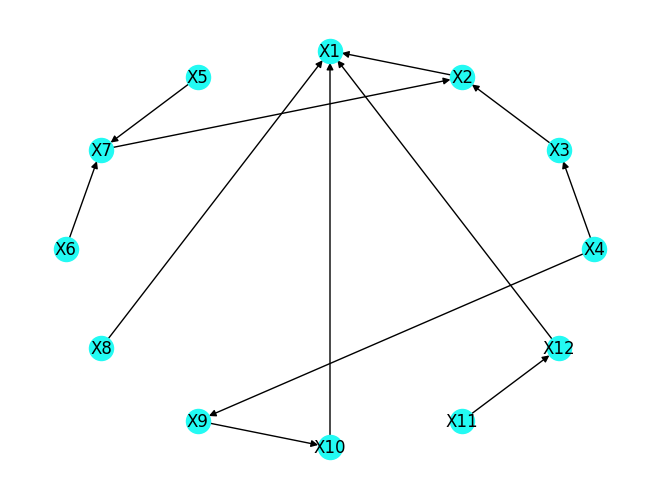

In [30]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_color='#23faf3')
plt.show()

### Step 2.2: Create the Conditional Probability Distributions of the Bayesian Network (20%)

#### Step 2.2.1: Build the probability distribution tables with TabularCPD (16%)

In [7]:
# your code goes here

#### Step 2.2.2: Associate the distribution models with the network structure (2%)

In [8]:
# your code goes here

#### Step 2.2.3: Check the model (2%)

In [9]:
# your code goes here

### Step 2.3: Infer Posterior Probability of “road is blocked” considering "late for work" as evidence. (10%)

In [10]:
# show the probability results
# your code goes here: